# sampling data 
from the orignal so we can test thing before implementing it to all of the data

In [46]:
import os
import kagglehub

data_path = kagglehub.dataset_download('sahilchambyal/solana-price-usd')

# List the files inside the downloaded data directory
for dirname, _, filenames in os.walk(data_path):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/Users/ash/.cache/kagglehub/datasets/sahilchambyal/solana-price-usd/versions/1/SOLUSD_1s_05NOV2024_to15NOV2024.csv
/Users/ash/.cache/kagglehub/datasets/sahilchambyal/solana-price-usd/versions/1/SOLUSD_1s_01NOV2024_to15NOV2024.csv
/Users/ash/.cache/kagglehub/datasets/sahilchambyal/solana-price-usd/versions/1/SOLUSD_1min_20AUG2020_to15NOV2024.csv


In [47]:
import pandas as pd
data = pd.read_csv(data_path + '/SOLUSD_1min_20AUG2020_to15NOV2024.csv')
# convert to df
df = pd.DataFrame(data)

In [48]:
# Display the first few rows of the data
df.head()

,OpenTime,Open,High,Low,Close,Volume,CloseTime,QuoteAssetVolume,NumberOfTrades,TakerBuyBaseVolume,TakerBuyQuoteVolume,Ignore
0,1597852080000,3.0000,3.0009,2.9893,2.9977,771.96,1597852139999,2315.230586,18,54.51,163.517987,0
1,1597852140000,2.9893,2.9958,2.9800,2.9953,2676.06,1597852199999,7981.488056,23,922.81,2754.110336,0
2,1597852200000,2.9823,2.9929,2.9800,2.9929,430.08,1597852259999,1281.903834,9,12.29,36.782741,0
3,1597852260000,2.9825,3.0046,2.9824,3.0045,601.93,1597852319999,1801.110659,11,340.03,1020.016758,0
4,1597852320000,2.9982,2.9982,2.9980,2.9980,116.81,1597852379999,350.199742,2,0.00,0.000000,0


In [49]:
# Display the last few rows of the data
df.tail()

,OpenTime,Open,High,Low,Close,Volume,CloseTime,QuoteAssetVolume,NumberOfTrades,TakerBuyBaseVolume,TakerBuyQuoteVolume,Ignore
2228995,1731591780000,215.27,216.20,215.27,215.76,6502.215,1731591839999,1.403323e+06,3937,4382.881,9.456026e+05,0
2228996,1731591840000,215.76,215.84,215.52,215.82,3084.711,1731591899999,6.652716e+05,2952,1711.371,3.690536e+05,0
2228997,1731591900000,215.82,216.09,215.63,215.63,6420.050,1731591959999,1.386333e+06,4350,3542.590,7.649240e+05,0
2228998,1731591960000,215.63,215.63,215.14,215.30,17499.586,1731592019999,3.769764e+06,4943,4593.328,9.888689e+05,0
2228999,1731592020000,215.30,215.44,215.02,215.08,7686.178,1731592079999,1.654606e+06,3867,5455.040,1.174334e+06,0


In [50]:
# Display the shape of the data
df.shape

(2229000, 12)

In [51]:
# Display the data types of the columns
df.dtypes

OpenTime                 int64
Open                   float64
High                   float64
Low                    float64
Close                  float64
Volume                 float64
CloseTime                int64
QuoteAssetVolume       float64
NumberOfTrades           int64
TakerBuyBaseVolume     float64
TakerBuyQuoteVolume    float64
Ignore                   int64
dtype: object

In [52]:
# Display summary statistics of the data
df.describe()

,OpenTime,Open,High,Low,Close,Volume,CloseTime,QuoteAssetVolume,NumberOfTrades,TakerBuyBaseVolume,TakerBuyQuoteVolume,Ignore
count,2.229000e+06,2.229000e+06,2.229000e+06,2.229000e+06,2.229000e+06,2.229000e+06,2.229000e+06,2.229000e+06,2.229000e+06,2.229000e+06,2.229000e+06,2229000.0
mean,1.664722e+12,6.960446e+01,6.967249e+01,6.953562e+01,6.960455e+01,3.146914e+03,1.664722e+12,2.138803e+05,3.610606e+02,1.565510e+03,1.069291e+05,0.0
std,3.860745e+10,6.347687e+01,6.353536e+01,6.341742e+01,6.347693e+01,6.183527e+03,3.860745e+10,4.743069e+05,7.724076e+02,3.349919e+03,2.535927e+05,0.0
min,1.597852e+12,1.079400e+00,1.101500e+00,1.030100e+00,1.059200e+00,0.000000e+00,1.597852e+12,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,1.631287e+12,2.053000e+01,2.054000e+01,2.052000e+01,2.053000e+01,6.320300e+02,1.631287e+12,1.829997e+04,4.900000e+01,2.483800e+02,7.363033e+03,0.0
50%,1.664722e+12,3.694000e+01,3.699000e+01,3.689000e+01,3.694000e+01,1.466380e+03,1.664722e+12,7.390459e+04,1.440000e+02,6.699090e+02,3.372677e+04,0.0
75%,1.698157e+12,1.307700e+02,1.309000e+02,1.306400e+02,1.307700e+02,3.333838e+03,1.698157e+12,2.197406e+05,3.720000e+02,1.632433e+03,1.058794e+05,0.0
max,1.731592e+12,2.597900e+02,2.599000e+02,2.596000e+02,2.598000e+02,6.430630e+05,1.731592e+12,3.074767e+07,4.548100e+04,3.472126e+05,2.377905e+07,0.0


In [53]:
# Display basic information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2229000 entries, 0 to 2228999
Data columns (total 12 columns):
 #   Column               Dtype  
---  ------               -----  
 0   OpenTime             int64  
 1   Open                 float64
 2   High                 float64
 3   Low                  float64
 4   Close                float64
 5   Volume               float64
 6   CloseTime            int64  
 7   QuoteAssetVolume     float64
 8   NumberOfTrades       int64  
 9   TakerBuyBaseVolume   float64
 10  TakerBuyQuoteVolume  float64
 11  Ignore               int64  
dtypes: float64(8), int64(4)
memory usage: 204.1 MB


In [54]:
# convert the OpenTime and CloseTime column to datetime
df['OpenTime'] = pd.to_datetime(df['OpenTime'], unit='ms')
df['CloseTime'] = pd.to_datetime(df['CloseTime'], unit='ms')

In [55]:
#head
df.head()

,OpenTime,Open,High,Low,Close,Volume,CloseTime,QuoteAssetVolume,NumberOfTrades,TakerBuyBaseVolume,TakerBuyQuoteVolume,Ignore
0,2020-08-19 15:48:00,3.0000,3.0009,2.9893,2.9977,771.96,2020-08-19 15:48:59.999,2315.230586,18,54.51,163.517987,0
1,2020-08-19 15:49:00,2.9893,2.9958,2.9800,2.9953,2676.06,2020-08-19 15:49:59.999,7981.488056,23,922.81,2754.110336,0
2,2020-08-19 15:50:00,2.9823,2.9929,2.9800,2.9929,430.08,2020-08-19 15:50:59.999,1281.903834,9,12.29,36.782741,0
3,2020-08-19 15:51:00,2.9825,3.0046,2.9824,3.0045,601.93,2020-08-19 15:51:59.999,1801.110659,11,340.03,1020.016758,0
4,2020-08-19 15:52:00,2.9982,2.9982,2.9980,2.9980,116.81,2020-08-19 15:52:59.999,350.199742,2,0.00,0.000000,0


CloseTime and ignore are redundent

In [56]:
# drop CloseTime column
df = df.drop(columns=['CloseTime'])
# drop ingore column
df = df.drop(columns=['Ignore'])

# Creating a sample df 

In [57]:
# Keep the last few rows of the data to maintain the sequence
slice_df = df.tail(10000)  # Adjust the number of rows as needed
slice_df.head()

,OpenTime,Open,High,Low,Close,Volume,QuoteAssetVolume,NumberOfTrades,TakerBuyBaseVolume,TakerBuyQuoteVolume
2219000,2024-11-07 15:08:00,188.86,188.88,188.54,188.74,9370.483,1.768418e+06,2971,4832.561,9.119013e+05
2219001,2024-11-07 15:09:00,188.74,188.96,188.56,188.93,4835.149,9.125216e+05,2609,3496.985,6.599994e+05
2219002,2024-11-07 15:10:00,188.93,189.19,188.85,189.17,8405.975,1.588755e+06,2986,6014.132,1.136701e+06
2219003,2024-11-07 15:11:00,189.16,189.37,188.97,188.97,5057.986,9.566327e+05,2887,2506.562,4.741531e+05
2219004,2024-11-07 15:12:00,188.97,188.98,188.67,188.90,3264.361,6.164641e+05,1696,1684.047,3.180154e+05


In [58]:
# Display the shape of the sample data
slice_df.shape

(10000, 10)

In [59]:
# describe the sample data
slice_df.describe()

,OpenTime,Open,High,Low,Close,Volume,QuoteAssetVolume,NumberOfTrades,TakerBuyBaseVolume,TakerBuyQuoteVolume
count,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,1.000000e+04
mean,2024-11-11 02:27:30,207.663905,207.871899,207.452366,207.666593,5093.389189,1.069462e+06,2748.118500,2549.675663,5.354050e+05
min,2024-11-07 15:08:00,188.740000,188.880000,188.540000,188.740000,114.663000,2.287522e+04,103.000000,33.867000,6.701564e+03
25%,2024-11-09 08:47:45,200.140000,200.250000,200.000000,200.140000,1963.263500,4.045442e+05,1426.000000,881.833500,1.811306e+05
50%,2024-11-11 02:27:30,207.110000,207.330000,206.895000,207.115000,3429.467500,7.197147e+05,2347.000000,1609.338000,3.367519e+05
75%,2024-11-12 20:07:15,214.490000,214.740000,214.225000,214.490000,6158.839750,1.300678e+06,3507.250000,2974.329250,6.265565e+05
max,2024-11-14 13:47:00,225.180000,225.210000,224.890000,225.170000,78845.842000,1.691226e+07,20571.000000,69746.596000,1.394943e+07
std,NaN,7.903611,7.949716,7.849706,7.901882,5462.375346,1.159724e+06,1913.385037,3253.682158,6.890367e+05


In [60]:
# save the sample data to a new csv file
slice_df.to_csv('solana_price_usd_sample.csv', index=False)

/var/folders/93/p0s3sy4d5hlgxwt8fpdw08sh0000gn/T/ipykernel_54801/46540485.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  slice_df['OpenTime'] = pd.to_datetime(slice_df['OpenTime'], unit='ms')


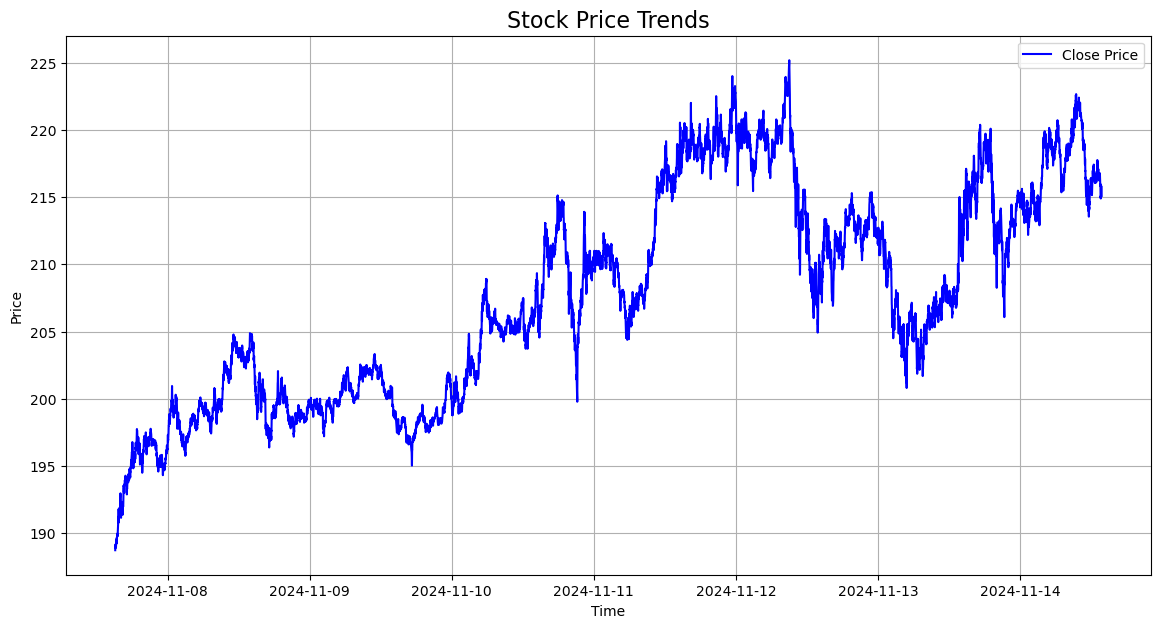

In [61]:
import matplotlib.pyplot as plt

# Convert OpenTime to datetime
slice_df['OpenTime'] = pd.to_datetime(slice_df['OpenTime'], unit='ms')

# Line chart for Close prices
plt.figure(figsize=(14, 7))
plt.plot(slice_df['OpenTime'], slice_df['Close'], label='Close Price', color='blue')
plt.title('Stock Price Trends', fontsize=16)
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()


In [ ]:
# import create_target_labels function
from features import create_target_labels